In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
##Read the data
df = pd.read_csv(r"churn_dataset.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.isnull().any() 

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [7]:
df.var()

C:\Users\INDIA\AppData\Local\Temp\ipykernel_10504\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


SeniorCitizen       0.135875
tenure            603.168108
MonthlyCharges    905.410934
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Sprint - 1 EDA 

### Continuos Variable

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

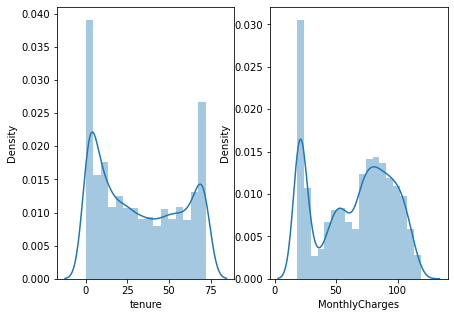

In [14]:
fig, axes = plt.subplots(1,2, figsize=(7, 5))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

In [15]:
df[['Contract','tenure']].groupby(['Contract']).mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


In [16]:
df[['Contract','MonthlyCharges','tenure']].groupby(['Contract']).mean()

,MonthlyCharges,tenure
Contract,,
Month-to-month,66.398490,18.036645
One year,65.048608,42.044807
Two year,60.770413,56.735103


### Binary Variable

In [17]:
columns = df.columns
bi_columns = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        bi_columns.append(col)

In [18]:
bi_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

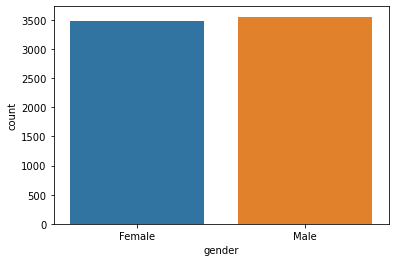

In [19]:
sns.countplot(df["gender"])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

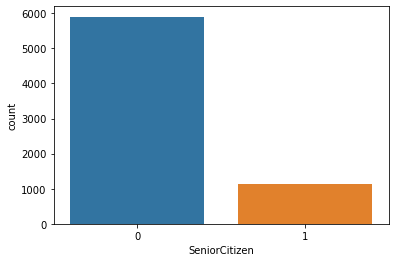

In [20]:
sns.countplot(df["SeniorCitizen"])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Partner', ylabel='count'>

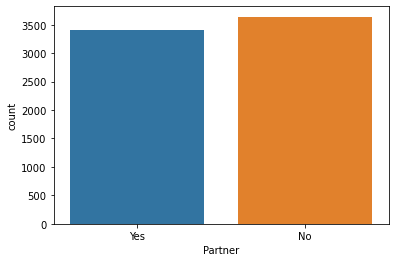

In [21]:
sns.countplot(df["Partner"])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

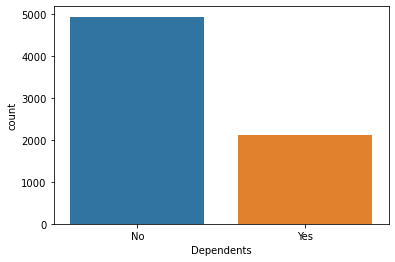

In [22]:
sns.countplot(df["Dependents"])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

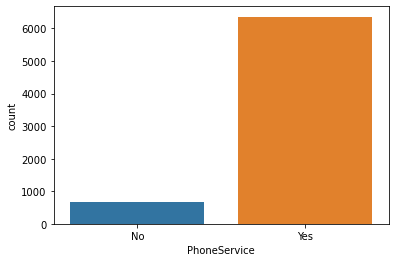

In [23]:
sns.countplot(df["PhoneService"])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

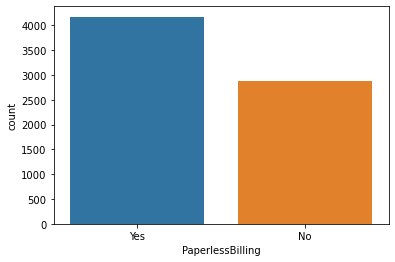

In [24]:
sns.countplot(df["PaperlessBilling"])

In [25]:
df["Churn"].replace({'Yes':1,'No':0}, inplace=True)

In [26]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


<AxesSubplot:xlabel='gender'>

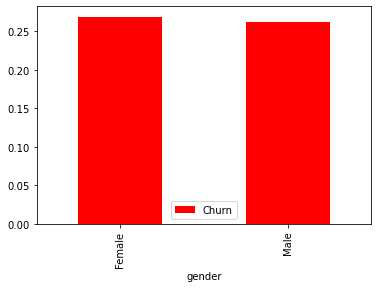

In [27]:
df[['gender','Churn']].groupby(['gender']).mean().plot(kind='bar',color='red')

### Categorical Variable

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

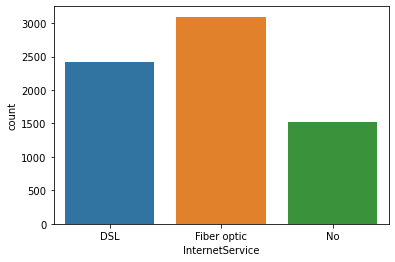

In [28]:
sns.countplot(df["InternetService"])

In [29]:
df[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\INDIA\anaconda3\lib\si

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

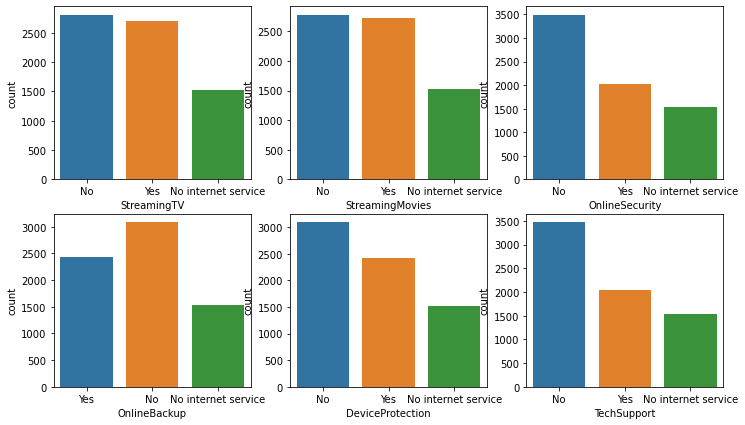

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

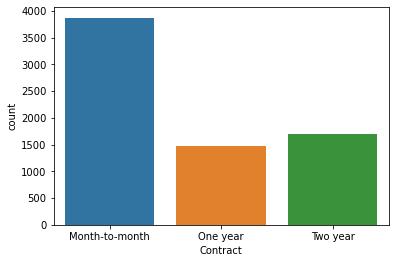

In [31]:
sns.countplot("Contract", data=df)

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

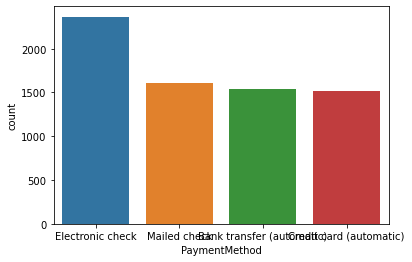

In [32]:
sns.countplot("PaymentMethod", data=df)

In [33]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [34]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [35]:
df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [36]:
df.drop(["customerID","gender","PhoneService","Contract","TotalCharges"], axis=1, inplace=True)

## Sprint - 2 Data Preprocessing

### One Hot Encoding

In [37]:
df = pd.get_dummies(df, columns=['SeniorCitizen','Partner', 'Dependents',
                                 'MultipleLines', 'InternetService',
                                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                                 'PaymentMethod'])

In [38]:
df

,tenure,MonthlyCharges,Churn,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,0,1,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,2,53.85,1,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4,2,70.70,1,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,1,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
7039,72,103.20,0,1,0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
7040,11,29.60,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,1,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [39]:
df.describe()

,tenure,MonthlyCharges,Churn,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.265370,0.837853,0.162147,0.516967,0.483033,0.700412,0.299588,0.481329,...,0.384353,0.395428,0.216669,0.387903,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880
std,24.559481,30.090047,0.441561,0.368612,0.368612,0.499748,0.499748,0.458110,0.458110,0.499687,...,0.486477,0.488977,0.412004,0.487307,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# spliting

In [42]:
X=df.drop(["Churn"], axis = 1)

In [43]:
X

,tenure,MonthlyCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,1,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,2,53.85,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
4,2,70.70,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
7039,72,103.20,1,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
7040,11,29.60,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [44]:
y=df["Churn"]

In [45]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test ,y_train,y_test=train_test_split (X,y,train_size=0.75,random_state=500)

In [48]:
X_train

,tenure,MonthlyCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6585,43,20.00,1,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
3933,9,19.70,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3575,59,51.70,1,0,1,0,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
5913,26,87.15,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4847,37,76.25,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,2,19.30,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
273,20,107.05,0,1,0,1,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
3905,3,35.20,1,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0
951,8,75.60,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [49]:
y_train

6585    0
3933    0
3575    0
5913    0
4847    1
       ..
3790    1
273     0
3905    1
951     0
7002    0
Name: Churn, Length: 5282, dtype: int64

# Scaling


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
sc=MinMaxScaler()

In [53]:
X_train = sc.fit_transform(X_train)

In [54]:
X_train

array([[0.59722222, 0.01741294, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.125     , 0.01442786, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.81944444, 0.33283582, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.04166667, 0.16865672, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.57064677, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.88888889, 0.86716418, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [55]:
X_test = sc.transform(X_test)

In [56]:
X_test

array([[0.01388889, 0.77014925, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.88888889, 0.7318408 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.97222222, 0.01890547, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.68055556, 0.8199005 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.51388889, 0.4960199 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.09722222, 0.02189055, 1.        , ..., 0.        , 0.        ,
        1.        ]])

# Build the model(KNN)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn_model=KNeighborsClassifier(n_neighbors=7,p=2)

In [59]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
y_pred = knn_model.predict(X_test)

# Accuray score

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
knn_test=(accuracy_score(y_test,y_pred) *100)
knn_test

75.92277115275412

In [63]:
y_pred_train=knn_model.predict(X_train)

In [64]:
knn_train=accuracy_score(y_train,y_pred_train)*100
knn_train

82.09011737978038

# logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
log_model=LogisticRegression(C=1.0,random_state=2)

In [67]:
log_model.fit(X_train,y_train)

LogisticRegression(random_state=2)

In [68]:
y_pred_log=log_model.predict(X_test)

# accuracy

In [69]:
log_test=(accuracy_score(y_test,y_pred_log) *100)

In [70]:
log_test

81.60136286201022

In [71]:
y_pred_log_train=log_model.predict(X_train)

In [72]:
y_pred_log_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
log_train=accuracy_score(y_train,y_pred_log_train)*100

In [74]:
log_train

80.14009844755773

# Support Vector Machines

In [75]:
from sklearn.svm import SVC

In [76]:
svm_model=SVC(C= 1.0, kernel="rbf")

In [77]:
svm_model.fit(X_train,y_train)

SVC()

In [78]:
y_pred_svm=svm_model.predict(X_test)

In [79]:
svm_test=(accuracy_score(y_test,y_pred_svm) *100)

In [80]:
svm_test

79.32992617830777

In [81]:
svm_train=accuracy_score(y_train,y_pred_log_train)*100

In [82]:
svm_train

80.14009844755773

# decision tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt_model = DecisionTreeClassifier(criterion="entropy")

In [85]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [86]:
y_pred_dt=dt_model.predict(X_test)

In [87]:
dt_test=(accuracy_score(y_test,y_pred_dt) *100)

In [88]:
dt_test

71.77739920499717

In [89]:
y_pred_train_dt=dt_model.predict(X_train)

In [90]:
dt_train=(accuracy_score(y_train,y_pred_train_dt) *100)

In [91]:
dt_train

99.65921999242711

# Booster 

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ada_model = AdaBoostClassifier(n_estimators=30)

In [94]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=30)

In [95]:
y_pred_ada=ada_model.predict(X_test)

In [96]:
y_pred_ada

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
ada_test=(accuracy_score(y_test,y_pred_ada) *100)

In [98]:
ada_test

81.54457694491765

In [99]:
y_pred_train_ada=ada_model.predict(X_train)

In [100]:
ada_train=(accuracy_score(y_train,y_pred_train_ada) *100)

In [101]:
ada_train

80.08330177962893

In [105]:
ml_data = {'Model':['KNN', 'LOG', 'SVM', 'DT','ADA'],
           'Test_accuracy':[75.9, 81.6, 79.3, 71.7, 81.5],
           'Train_accuracy':[82.0, 80.1, 80.1, 99.6, 80.0]}
 

In [106]:
df = pd.DataFrame(ml_data)

In [107]:
df


,Model,Test_accuracy,Train_accuracy
0,KNN,75.9,82.0
1,LOG,81.6,80.1
2,SVM,79.3,80.1
3,DT,71.7,99.6
4,ADA,81.5,80.0


<AxesSubplot:xlabel='Model', ylabel='Test_accuracy'>

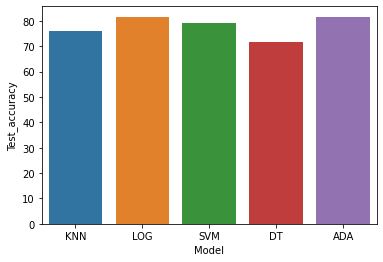

In [108]:
sns.barplot(x = df["Model"] ,y = df["Test_accuracy"])

<AxesSubplot:xlabel='Model', ylabel='Train_accuracy'>

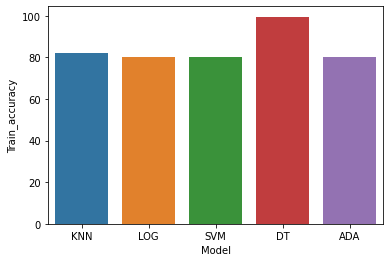

In [109]:
sns.barplot(x = df["Model"] ,y = df["Train_accuracy"])

-- By applying KNN, Logistic Regression, SVM, Decition Tree and Ada Boost 
-- Logistic Regression Gives the best amoung other Algorithms